# Model classification I – building blocks

<div style="text-align: center; font-style: italic;">

“A problem well stated is a problem half-solved.”

</div>

<div style="text-align: right;">

— Charles F. Kettering

</div>


## 1 Model classification and structure

### 1.1 What are models?  From toy cathedrals to floating point arithmetic

<div style="text-align: center; font-style: italic;">
To measure is to know.
</div>

<div style="text-align: right;">

— William Thomson (Lord Kelvin), 1883

</div>


While we often think of models as mathematical equations, the mathematication of nature is a relatively recent development in the history of science and engineering. Models have existed in various forms for centuries, evolving from physical constructions to modern abstract mathematical representations. Some historical milestones in the practice of modelling include:

### 1.2 **Medieval (Physical (literal) models)**
 -  Medieval master-builders often erected stick-and-string scale models of vaults and domes to study thrust lines.
 -  **Brunelleschi’s** herringbone brick pattern for the Florence Duomo (1430s) was tested on a wooden mock-up before construction.

<img src="./images/1_1_brunelleschi_dome_wood_model.jpg"
     alt="Brunelleschi's dome wood model (The Opera del Duomo Museum in Florence), CC 4.0 license"
     width="400">


 - These tangible artefacts embodied the equilibrium of forces as a precursor to statics theory, itself a precursor to more complex mathematized models of nature such as Newtonian Physics.

### 1.3 **Early mathematical models (smooth models)**

  - **Jordanus de Nemore** (13 th c.) treated levers and centres of gravity with geometric abstraction.

<img src="./images/1_2_Jornadus.jpg"
     alt="Jordanus de Nemore's treament of levers was the first explicit use of force components in the development of statics, built on Archimedes' lever law, CC 3.0 license (echo, mpiwg, 2015)"
     width="400">

  - **Galileo Galilei** (1600s) introduced the concept of inertia and the first mathematical model of motion, laying the groundwork for classical mechanics.
  - **Isaac Newton's** _Principia_ (1687) ushered in the era of mathematical physics, introducing calculus to describe motion and forces.
  - **Leonhard Euler** (1740s) and **D’Alembert** introduced differential equations to describe beams, fluids, and celestial mechanics.
    Euler’s equation for a buckling column is still taught today.

### 1.4 **Modern, discrete models (numerical models)**
  - Early hand computations by Isaac Newton, Gottfried Wilhelm Leibniz and others laid the groundwork for numerical methods.
  - First general purpose high level programming language Plankalkül (1942), Claude Shannon’s information theory (1948) and von Neumann’s stored-program computer made it routine to encode physics directly in software.

Our focus in this module is on discrete or digital models, which are fundamentally different to both physical and smooth models in a subtle and important way: while smooth mathematical models can often admit exact solutions, discretized models -by contrast- rarely admit exact solutions. This is not only due to numerical errors, but due to the fact that these models live in an entirely different space and number system. E.g. smooth models often have scalar variables represented by real numbers ($\mathbb{R}^n$) which is _not_ a computational structure! By contrast models for control systems often rely on a discrete $\mathbb{Z}^n$ representation of scalar variables arising from inherently discrete measurements in the control loop.

For the purposes of this course, we will define a model as follows:
>
> **Definition:** A *model* is an abstraction which is a deliberate simplification of nature that allows quantitative prediction.

In order to make predictions with *computational models*, it is essential to correctly classify them in order to find the correct abstracted method for their solutions which in turn is used to predict the outcome of systems such as the dynamics spacecraft, robots, or chemical processes. Later we will study the optimization (design, parameterisation) and control of systems.

---

## 2 Classification of models

Models admit different *structures* which can be classified in order to gain better understanding of their properties. Once a model has been classified it becomes easier to compute. Understanding the limitations of state-of-the-art methods used to solve different model types is essential to both model development and computational efficiency of solutions.

When trying to solve your computational problem model classification tells you:

* Which numerical methods will work.
* The expected accuracy and computational cost of solving the system.
* Whether you can exploit powerful results from linear-system theory (superposition, symmetry, modal analysis, controllability, etc.).





### 2.1 Static vs. dynamic

Models differ in their treatment of time: static models describe systems at equilibrium where time derivatives are zero, focusing on steady-state solutions. Dynamic models incorporate time evolution, capturing transient behaviors and responses to inputs. This classification guides the choice of solvers: algebraic for static, integrators for dynamic—and is vital in fields like spacecraft trajectory planning, where static approximations may suffice for equilibrium orbits but dynamics are essential for maneuvers.

|                               | Static                                                                                                                                         | Dynamic                                                                                                                                                                   |
|-------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Abstraction                   | $\mathbf{f}(\mathbf{x}) = \mathbf{0}$ (no time derivatives)                                                                                    | $\frac{d\mathbf{y}}{dt} = \mathbf{f}(\mathbf{y}, \mathbf{x}, t)$ or $\mathbf{y}(t+1) = \mathbf{f}(\mathbf{y}(t), \mathbf{x})$                                             |
| Typical mathematized examples | $A\mathbf{x} = \mathbf{b}$ (linear system) <br> $\nabla^2 x = c$ (Poisson's equation) <br>$\nabla \cdot (k \nabla T) = 0$ (steady-state heat) | $\frac{dy}{dt} = -k x$ (exponential decay) <br>$\frac{d^2y}{dt^2} + \omega^2 x = 0$ (simple harmonic motion)   <br> $\frac{\partial y}{dt} = k \nabla^2 T$ (dynamic heat) |
| Examples in nature            | Truss analysis in civil engineering (equilibrium forces); <br>Steady-state heat conduction in a satellite panel                                | Launch trajectory optimization (time-varying thrust); <br>Satellite attitude slew maneuver (rotational dynamics over time)                                                |

> **Definition:** Let $\mathcal{x}$ be a state space and $\mathcal{F}$ a model mapping. The model is **static** if $\mathcal{X} : \mathcal{X} \to \mathcal{X}$ does not explicitly depend on time $t$ and involves no time derivatives (i.e., equilibrium conditions). It is **dynamic** if $\mathcal{F} : \mathcal{Y} \times \mathbb{R} \to \mathcal{Y}$ includes time derivatives or discrete time steps, describing evolution over $t \in \mathbb{R}$ or $t \in \mathbb{Z}$.

#### Static problems

Static problems typically arise from modelling physical and chemical systems at equilibrium, where the state does not change over time. These problems can be represented by algebraic equations, differential- or partial differential equations (PDEs) that describe the relationships between variables without involving time derivatives. Examples include structural analysis (statics and strength of materials), heat conduction, and fluid statics. It should be noted that time is not absent in static models, but rather the variables in the equations are not affected by time. For example, financial models may be static in the sense that they do not change over time, but they still involve variables that are functions of time, such as interest rates or stock prices. Such models are important in engineering when optimizing systems for cost saving or computing expected cash flows due to production, maintenance or repairs etc. which accumulate over time.

#### Static solvers
Static equations are typically solved with _root-finding_ methods, which find the roots of the residual function $\mathbf{F}(\mathbf{x}) = \mathbf{0}$, where $\mathbf{F}$ encodes the algebraic system such as a vector of functions. Common numerical methods such as those implemented in scipy include:

##### Common SciPy-based approaches
| Problem type                        | scipy implementation                              | Notes                                            |
|-------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Scalar, nonlinear**               | `scipy.optimize.root_scalar`                      | Bisection, secant, Brent, Ridder …               |
| **Vector, nonlinear**               | `scipy.optimize.root` <br>`scipy.optimize.fsolve` | Newton–Krylov, hybr, Levenberg–Marquardt         |
| **Least-squares residuals**         | `scipy.optimize.least_squares`                    | Gauss-Newton, trust-region reflective            |
| **Fixed-point iteration**           | `scipy.optimize.fixed_point`                      | Finds $x = f(x)$ directly                        |
| **Dense linear system**             | `scipy.linalg.solve`                              | $A\mathbf{x} = \mathbf{b}$ with LU factorisation |
| **Sparse linear system**            | `scipy.sparse.linalg.spsolve`                     | For large, sparse $A$                            |

---


The simples example is solving a non-linear single variable equation such as $f(x) = x^2 - 5 = 0$ using `scipy.optimize.root_scalar`:


In [1]:
from scipy.optimize import root_scalar

f = lambda x: x**2 - 5
sol = root_scalar(f, bracket=[0, 3], method='brentq')

print(f"Root = {sol.root:.6f}")        # ~2.236068 (≈ √5)

Root = 2.236068


Most systems engineers will deal with are multivariate, which is still solved with the same methods, but now the residual function $\mathbf{F}(\mathbf{x})$ is a vector of functions. The simplest example is solving a linear system of equations such as $Ax = b$ using `scipy.linalg.solve`:

In [2]:
import numpy as np
from scipy.linalg import solve

A = np.array([[3.0, 1.0],
              [1.0, 2.0]])
b = np.array([9.0, 8.0])

x = solve(A, b)        # direct LU factorisation
print("x =", x)        # → [2. 3.]

x = [2. 3.]


An important concept in solving complex non-linear models accurately and efficiently is the notion of the Jacobian matrix, which is the matrix of all first-order partial derivatives of the residual function $\mathbf{F}(\mathbf{x})$. The Jacobian is used to improve convergence in iterative methods such as Newton's method and will be discussed in more detail in ["Week 4: Simulation I – algebraic systems"](../notebooks/04_simulation-algebraic.ipynb)


#####  Example: Steady-state heat conduction on a square plate

Below is a more complex model of the Laplace equation $\nabla\!\cdot\!\bigl(k\nabla T\bigr)=0$ with Dirichlet boundary condition. Such complex systems involving gradients can still be solved with the same root solver abstractions. It's important to get comfortable with the geometric meaning of operators like $\nabla$ for which static models become a great tool to gain deeper understanding for yourself with respect to its effect on scalar and vector fields. In the demonstration below you can interactively change the temperature on the top edge of the plate and see how the steady-state temperature scalar field changes.

The solution is computed using a root-finding method that iteratively solves for the temperature at each grid point until convergence is reached. Later we will learn a lot about how operators such as $\nabla$ can be discretized, analyzed for stability and solved efficiently using numerical methods such as finite difference, finite element or finite volume methods. The example below is a simple finite difference method that uses the average of the neighbouring grid points to compute the temperature at each point in the grid.

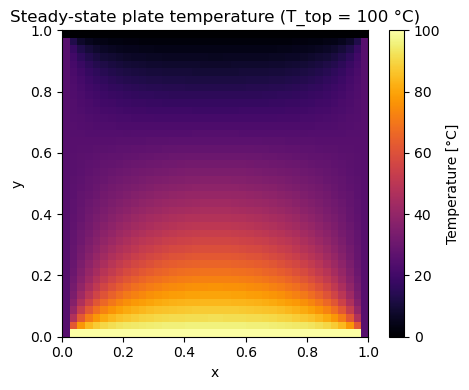

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from ipywidgets import interact, FloatSlider

# --- geometry (small grid keeps each update <1 s) ------------------------------
nx = ny = 40
T_left, T_right, T_bot = 25, 25, 0     # fixed BCs on three sides
T_top  = 100  # Adjustable hot domain
N = (nx - 2) * (ny - 2)
idx = lambda i, j: (i - 1) * (nx - 2) + (j - 1)

def solve_laplace(T_top):
    """Return full temperature field for a given top-edge BC."""
    # residual uses closure to capture T_top
    def F(x):
        r = np.empty_like(x)
        for i in range(1, ny - 1):
            for j in range(1, nx - 1):
                k   = idx(i, j)
                Tij = x[k]

                Tl = x[idx(i, j-1)] if j > 1     else T_left
                Tr = x[idx(i, j+1)] if j < nx-2  else T_right
                Tu = x[idx(i-1, j)] if i > 1     else T_top   # << slider
                Td = x[idx(i+1, j)] if i < ny-2  else T_bot

                r[k] = Tij - 0.25 * (Tl + Tr + Tu + Td)
        return r

    sol = root(F, np.zeros(N), method='krylov', tol=1e-10)
    x   = sol.x.reshape(ny-2, nx-2)

    # assemble full array including boundaries
    T = np.zeros((ny, nx))
    T[0, :]  = T_top
    T[:, 0]  = T_left
    T[:, -1] = T_right
    T[-1, :] = T_bot
    T[1:-1, 1:-1] = x
    return T


T = solve_laplace(100)
plt.figure(figsize=(5, 4))
plt.imshow(T, origin='lower', cmap='inferno', extent=[0, 1, 0, 1])
plt.colorbar(label='Temperature [°C]')
plt.title(f'Steady-state plate temperature (T_top = {T_top:.0f} °C)')
plt.xlabel('x'); plt.ylabel('y')
plt.tight_layout(); plt.show()

In [4]:
# --- interactive plot ----------------------------------------------------------
@interact(T_top=FloatSlider(value=100., min=0., max=150., step=5.,
                            description='Top BC [°C]'))
def plot_plate(T_top):
    T = solve_laplace(T_top)

    plt.figure(figsize=(5, 4))
    plt.imshow(T, origin='lower', cmap='inferno', extent=[0, 1, 0, 1])
    plt.colorbar(label='Temperature [°C]')
    plt.title(f'Steady-state plate temperature (T_top = {T_top:.0f} °C)')
    plt.xlabel('x'); plt.ylabel('y')
    plt.tight_layout(); plt.show()

interactive(children=(FloatSlider(value=100.0, description='Top BC [°C]', max=150.0, step=5.0), Output()), _do…

#### Dynamic problems

Dynamic problems arise whenever the state of a system **changes with time**.
The governing equations therefore contain **time derivatives** (continuous-time
models) or **time steps** (discrete-time models).
For space engineers these include orbit propagation, attitude control, launch
ascent, thermal-soak transients, chemical-reaction kinetics, and coupled
orbit–attitude simulations.

Mathematically we meet

* **ODEs**  $\displaystyle\frac{d\mathbf{y}}{dt}= \mathbf{f}(\mathbf{y},\mathbf{x},t)$
  (rigid-body attitude, electrical RC networks, reaction wheels),
* **DAEs** $\displaystyle\mathbf{F}(\mathbf{y},t), \frac{d\mathbf{y}}{dt}=\mathbf{g}(\mathbf{y},t)$
  (constrained multibody, orbital rendezvous with thruster constraints),
* **Time-dependent PDEs** $\displaystyle\frac{\partial T}{\partial t}=k\nabla^2T$
  (transient heat in a re-entry shield, fluid slosh).

The numerical goal is to advance the solution step-by-step so that $\mathbf{y}(t_{n+1})$ approximates the true state at the next time index.

#### Dynamic solvers

Unlike static root-finders, dynamic solvers are **integrators**.
SciPy wraps most standard algorithms under a single façade—`scipy.integrate.solve_ivp`.

| Problem type                              | SciPy implementation                                   | Notes |
|-------------------------------------------|--------------------------------------------------------|-------|
| **Non-stiff ODE**                         | `solve_ivp(method="RK45")` (default)                   | Dormand–Prince (5/4) adaptive, energy-friendly for orbits |
| **High-accuracy ODE**                     | `solve_ivp(method="DOP853")`                           | 8-th order, good for long-term propagation |
| **Stiff ODE / index-1 DAE**               | `solve_ivp(method="BDF")`<br>`solve_ivp(method="Radau")` | Implicit, variable-order multi-step / collocation |
| **Mixed stiff/non-stiff (“auto”)**        | `solve_ivp(method="LSODA")`                            | Switches between Adams and BDF (same core as ODEPACK) |
| **Event detection (zero-crossing)**       | `solve_ivp(..., events=callbacks)`                     | Apogee/perigee, eclipse entry/exit, impact |
| **Fixed-point map / discrete-time**       | Iterate \(\mathbf{y}_{k+1}=f(\mathbf{y}_k,\mathbf{x})\) | One-line Python loop or `numpy.linalg.matrix_power` for linear maps |
| **Large sparse ODE/PDE semi-discrete**    | `scipy.sparse.linalg.expm_multiply` inside a Krylov step | Matrix-free exponential integrators |

---

#### Example: Minimal scalar example – exponential decay


First for a very simple dynamic scalar model we can solve an ODE like:

$$\displaystyle\frac{dy}{dt}=-k\,y,\;y(0)=1$$

using scipy's integrate package and compare the accuracy with the analytical solution:



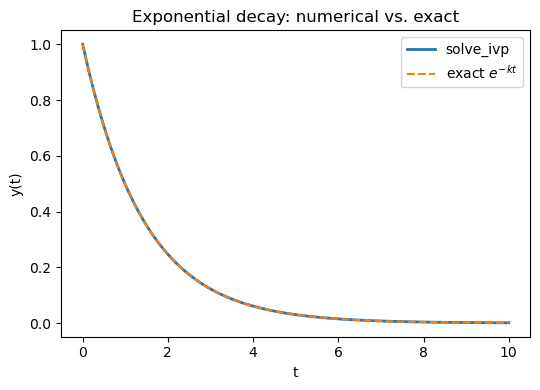

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.integrate import solve_ivp

# --- everything up to this point is exactly what you already have ---
k = 0.7
decay = lambda t, y: -k * y
sol = solve_ivp(decay, t_span=[0, 10], y0=[1.0], rtol=1e-9, atol=1e-12)

# Analytical solution on the same time grid
t_exact = sol.t
y_exact = np.exp(-k * t_exact)

# Plot results
plt.figure(figsize=(5.5, 4))
plt.plot(sol.t, sol.y[0], label='solve_ivp', lw=2)
plt.plot(t_exact, y_exact, '--', label='exact $e^{-kt}$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Exponential decay: numerical vs. exact')
plt.legend()
plt.tight_layout()
plt.show()


#### Example: Simple harmonic oscillator with interactive controls

The simple harmonic oscillator (SHO) is a classic example of a dynamic system that can be described by a second-order ordinary differential equation (ODE). The SHO is characterized by its oscillatory motion, which can be described by the equation:

$$ \frac{d^2x}{dt^2} + \omega^2 x = 0 $$

where \(x\) is the displacement from the equilibrium position, \(\omega\) is the angular frequency, and \(t\) is time. The SHO can be solved using numerical methods such as the Runge-Kutta method or the Verlet method. In this example, we will use the `scipy.integrate.solve_ivp` function to solve the SHO equation and visualize the results.

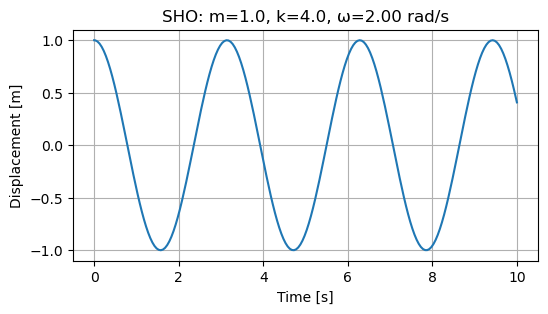

interactive(children=(FloatSlider(value=1.0, description='m', max=5.0, min=0.5, step=0.5), FloatSlider(value=4…

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import solve_ivp

def simulate(m=1.0, k=4.0, x0=1.0, v0=0.0, t_end=10.0):
    omega = np.sqrt(k/m)
    def sho(t, y):       # y = [x, v]
        return [y[1], -k/m * y[0]]

    sol = solve_ivp(sho, [0, t_end], [x0, v0], max_step=0.05)
    t, x = sol.t, sol.y[0]

    plt.figure(figsize=(6, 3))
    plt.plot(t, x)
    plt.xlabel('Time [s]')
    plt.ylabel('Displacement [m]')
    plt.title(f'SHO: m={m}, k={k}, ω={omega:.2f} rad/s')
    plt.grid(True)
    plt.show()

simulate(m=1.0, k=4.0, x0=1.0, v0=0.0, t_end=10.0)

interact(simulate,
         m=(0.5, 5.0, 0.5),
         k=(1.0, 10.0, 0.5),
         x0=(-2.0, 2.0, 0.2),
         v0=(-2.0, 2.0, 0.2),
         t_end=(2.0, 20.0, 1.0));


### 2.2 Linear vs. non-linear

|                               | Linear                                       | Non-linear                                      |
|-------------------------------|----------------------------------------------|-------------------------------------------------|
| Abstraction                   | $A\,\mathbf{x}= \mathbf{b}$                  | $\mathbf{f}(\mathbf{x}) = \mathbf{0}$           |
| Typical mathematized examples | $x_1 + x_2 = 5^2$, <br>$\frac{d^2y}{dx^2} = k y$ | $x_1^2 + x_2^2 = 5^2$,  <br>$\frac{dy}{dx} = k y^2$ |
| Examples in nature            | Mass–spring system at small deflection       | Duffing oscillator, orbital dynamics            |

Linearity is an important concept in modelling, linear models are highly desirable because they are easier to analyse and solve. Linear methods are highly scalable to millions of variables and a great effort is made to find linear model representations or to linearize inherently non-linear natural processes. In contrast, non-linear models involve non-linear relationships between variables, making them more complex and often harder to solve.

> **Definition:** Let $\mathcal{X}$ be a vector space and $\mathcal{F} : \mathcal{X}\to\mathcal{X}$ a mapping that represents the model (algebraic or differential).
$\mathcal{F}$ is **linear** _iff_ it satisfies **superposition** for all $ \mathbf{x},\mathbf{y}\in\mathcal{X}$ and $ \alpha\in\mathbb{R}$:
>
> 1. **Additivity**: $\mathcal{F}(\mathbf{x}+\mathbf{y}) = \mathcal{F}(\mathbf{x}) + \mathcal{F}(\mathbf{y}) $
> 2. **Homogeneity**: $ \mathcal{F}(\alpha\,\mathbf{x})  = \alpha\,\mathcal{F}(\mathbf{x}) $

Identifying linearity is partricularly important since linear solvers are far faster and more accurate than non-linear solvers, in the examples below we demonstrate how to write both families in linear standard form.


#### 2.2.1 Multivariable _linear_ static example

Most models you will encounter will likely be written in non-standard form. It's important to be able to transform the model to standard forms that can be solved with powerful numerical libraries. Consider the following example:

*Reaction forces in a satellite-bus support frame* _(Hibbeler, Engineering Mechanics – Statics, §16-4 “Method of Joints” (numbers differ) • Logan, A First Course in the Finite Element Method, Ex. 2-2)_

A triangular support carries a payload mass \(m\) at node 3.
Nodes 1 & 2 are fixed to the bus deck (see figure below).
Assuming axial members only (truss), the static equilibrium is


$$
\begin{aligned}
  8\times10^{5}\,u_1 \;-\;2\times10^{5}\,u_2 \;-\;6\times10^{5}\,u_3 &= 0, \\[4pt]
 -2\times10^{5}\,u_1 \;+\;8\times10^{5}\,u_2 \;-\;-4\times10^{5}\,u_3 &= 0, \\[4pt]
 -6\times10^{5}\,u_1 \;-\;6\times10^{5}\,u_2 \;+\;1.2\times10^{6}\,u_3 &= -m g.
\end{aligned}
$$

In order to convert this to standard form we must first identify the variables we are trying to solve (in this case clearly $u_i$). For this course we will always use $x_i$ to denote scalar variables while the vector $\mathbf{x}$ represents contains all the variables of our system $x_1, x_2, \dots \in \mathbf{x}$. In linear systems these variables always have **coefficients** $a_{ij}$ which are contained in the **coefficient matrix** $a_{ij} \in \mathbf{A}$. Finally, the constant vector $b_i \in \mathbf{b}$ must always be moved to the right hand side of the system of equations in the **standard form**:

$$
\mathbf{x} \;=\;
\begin{bmatrix} x_1\\ x_2\\ x_3 \end{bmatrix}
\;=\;
\begin{bmatrix} u_1\\ u_2\\ u_3 \end{bmatrix},
\qquad
\mathbf{A} \;=\;
\begin{bmatrix}
a_{11}&a_{12}&a_{13}\\
a_{21}&a_{22}&a_{23}\\
a_{31}&a_{32}&a_{33}
\end{bmatrix},
\qquad
\mathbf{b} \;=\;
\begin{bmatrix} 0\\ 0\\ -m g \end{bmatrix},
$$

with coefficients defined by

$$
\begin{aligned}
a_{11}= 8{\times}10^{5}, &\; a_{12}= -2{\times}10^{5}, &\; a_{13}= -6{\times}10^{5},\\
a_{21}= -2{\times}10^{5}, &\; a_{22}=  8{\times}10^{5}, &\; a_{23}= -6{\times}10^{5},\\
a_{31}= -6{\times}10^{5}, &\; a_{32}= -6{\times}10^{5}, &\; a_{33}=  1.2{\times}10^{6}.
\end{aligned}
$$

and constants:

$$
\begin{aligned}
b_{1}= 0,\\
b_{2}= 0,\\
b_{3}= - m g
\end{aligned}
$$


It is _always_ possible to convert linear systems to this standard form, then we are left with the matrix equation:

$$
\boxed{\;
\mathbf{A}\,\mathbf{x} = \mathbf{b}\;} .
$$

which can be solved easily using a standard _linear algebra solver_ such as numpy:


In [7]:
import numpy as np
from scipy.linalg import solve
A = np.array([[ 8e5, -2e5, -6e5],
              [-2e5,  8e5, -4e5],
              [-6e5, -6e5,  1.2e6]])
m, g = 50.0, 9.81
b = np.array([0, 0, -m*g])
X = solve(A, b)           # solution for x_i
X

array([-0.002289 , -0.0017985, -0.0024525])

Linear algebra solvers are typically very fast and efficient, even for large systems with millions of variables. They are based on matrix factorization methods such as LU decomposition, which allow for efficient solution of linear systems. By contranst non-linear systems cannot be solved with linear algebra solvers, but rather require iterative methods such as Newton's method or fixed-point iteration such as those introduced earlier and wrapped into `scipy.optimize.fsolve` or `scipy.optimize.root`.

#### 2.2.2 Multivariable **non-linear** static example

While every linear system can be reduced to the matrix form
$\mathbf{A}\mathbf{x}=\mathbf{b}$,
**non-linear** static problems lead to *residual equations*
$\mathbf{F}(\mathbf{x})=\mathbf{0}$.
We must therefore define a vector function $\mathbf{F}$ instead of a coefficient matrix.

Consider the steady-state heat balance of **two radiating CubeSat faces**
(Gilmore, *Spacecraft Thermal Control Handbook*, Ch. 5).

A face receives constant absorbed power $q_{\text{in},i}$, radiates to deep space
($T_\text{space}\simeq3\,$K) and conducts to its neighbour:

$$
\begin{aligned}
0 &= q_{\text{in},1}
     -\varepsilon\sigma A\!\left(T_{1}^{4}-T_{\text{space}}^{4}\right)
     -G\,(T_{1}-T_{2}), \\[6pt]
0 &= q_{\text{in},2}
     -\varepsilon\sigma A\!\left(T_{2}^{4}-T_{\text{space}}^{4}\right)
     +G\,(T_{1}-T_{2}).
\end{aligned}
$$

#### Identify variables and build the **standard non-linear form**

* **Variables** $\mathbf{x}=\begin{bmatrix}x_1\\x_2\end{bmatrix}
                 =\begin{bmatrix}T_1\\T_2\end{bmatrix}$

* **Residual vector** $\mathbf{F}(\mathbf{x})
  =\begin{bmatrix}F_1(\mathbf{x})\\F_2(\mathbf{x})\end{bmatrix}$
  with

$$
  \begin{aligned}
  F_1(\mathbf{x}) &=
     q_{\text{in},1}
    -\varepsilon\sigma A\bigl(x_{1}^{4}-T_{\text{space}}^{4}\bigr)
    -G\,(x_{1}-x_{2}),\\[4pt]
  F_2(\mathbf{x}) &=
     q_{\text{in},2}
    -\varepsilon\sigma A\bigl(x_{2}^{4}-T_{\text{space}}^{4}\bigr)
    +G\,(x_{1}-x_{2}).
  \end{aligned}
$$

* **Standard form**

$$
    \boxed{\;
      \mathbf{F}(\mathbf{x}) = \mathbf{0}\;}
  \qquad\Longrightarrow\qquad
  \text{solve for }\mathbf{x}.
$$

This has to be solved with the more expensive `scipy.optimize.fsolve` family of solvers as we had before:

In [8]:
import numpy as np
from scipy.optimize import fsolve

# physical parameters
eps   = 0.8                      # emissivity
sigma = 5.670374e-8              # Stefan–Boltzmann, W m⁻² K⁻⁴
A     = 0.04                     # 10 cm × 10 cm face, m²
G     = 0.5                      # conductive coupling, W K⁻¹
Tsp   = 3.0                      # deep-space sink temperature, K
qin1, qin2 = 6.0, 2.0            # absorbed power, W

def F(X):
    x1, x2 = X
    F1 = qin1 - eps*sigma*A*(x1**4 - Tsp**4) - G*(x1 - x2)
    F2 = qin2 - eps*sigma*A*(x2**4 - Tsp**4) + G*(x1 - x2)
    return [F1, F2]

T_guess = [300.0, 290.0]         # initial guess, K
T1, T2  = fsolve(F, T_guess)
print(f"T1 = {T1:.1f} K,   T2 = {T2:.1f} K")

T1 = 218.5 K,   T2 = 214.8 K


#### Example: Linear vs non-linear response of a spring

Below we demonstrate the difference between linear and non-linear response of a spring system. The linear spring is described by Hooke's law, while the Duffing oscillator is a non-linear system that exhibits more complex behavior. The Duffing oscillator is a well-known example of a non-linear system that can exhibit chaotic behavior under certain conditions.
The linear spring is described by the equation \(F = kx\), where \(F\) is the force, \(k\) is the spring constant, and \(x\) is the displacement from the equilibrium position. The Duffing oscillator is described by the equation:
$$\frac{d^2x}{dt^2} + \delta \frac{dx}{ dt} + \alpha x + \beta x^3 = \gamma \cos(\omega t)$$
where \(\delta\) is the damping coefficient, \(\alpha\) and \(\beta\) are the linear and non-linear stiffness coefficients, \(\gamma\) is the amplitude of the driving force, and \(\omega\) is the frequency of the driving force.
The example below uses `scipy.integrate.solve_ivp` to solve both systems and plot their responses over time. The linear spring will exhibit simple harmonic motion, while the Duffing oscillator will show more complex behavior, especially for larger driving forces or non-linear stiffness coefficients.

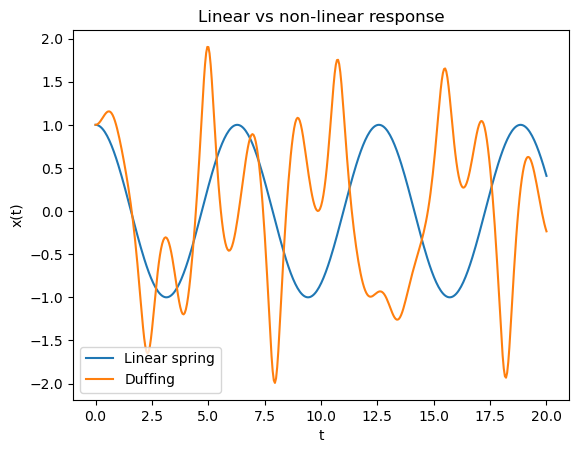

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def linear_spring(t, y, k=1.0, m=1.0):
    x, v = y
    return [v, -k/m * x]

def duffing(t, y, alpha=1.0, beta=5.0, delta=0.02, gamma=8.0, omega=1.2):
    x, v = y
    return [v, -delta*v - alpha*x - beta*x**3 + gamma*np.cos(omega*t)]

sol_lin = solve_ivp(linear_spring, [0, 20], [1, 0], max_step=0.05)
sol_non = solve_ivp(duffing,       [0, 20], [1, 0], max_step=0.05)

plt.plot(sol_lin.t, sol_lin.y[0], label="Linear spring")
plt.plot(sol_non.t, sol_non.y[0], label="Duffing")
plt.xlabel("t"); plt.ylabel("x(t)")
plt.legend(); plt.title("Linear vs non-linear response");

#### Example: Linearized satellite relative motion
In this example, we will demonstrate the linearized relative motion of a satellite in orbit. The Hill–Clohessy–Wiltshire (HCW) equations describe the relative motion of a chaser satellite about a chief on a circular orbit are a set of linearized equations that describe the relative motion of a satellite in orbit:

$$
\begin{aligned}
\ddot x & =\;\;  3n^{2}x + 2n\dot y + a_x,\\
\ddot y & = -2n\dot x          + a_y,\\
\ddot z & = -n^{2}z            + a_z,
\end{aligned}
\qquad n \;=\;\sqrt{\dfrac{\mu}{a^{3}}}\;,
$$

where
$(x,y,z) $ are radial, along-track, cross-track offsets,
$ n $ the mean motion of the chief,
$ a_{x,y,z}$ thrust accelerations.


The example below uses `scipy.integrate.odeint` to solve the hcw equations and plot the relative motion of the satellite.

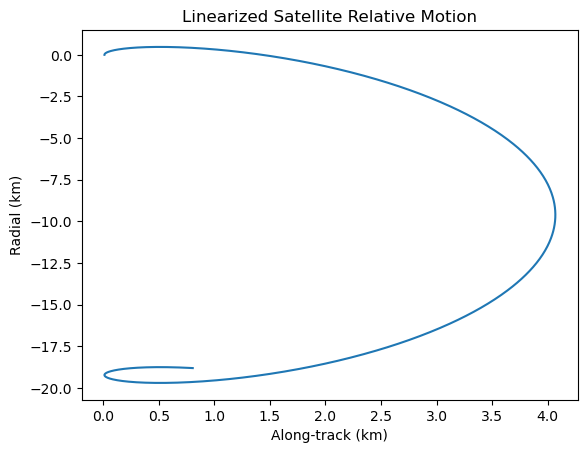

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def hcw(y, t, n):
    return [y[3], y[4], y[5], 3*n**2*y[0] + 2*n*y[4], -2*n*y[3], -n**2*y[2]]

n = 0.001  # Orbital rate
y0 = [0.01, 0, 0, 0, 0.001, 0]
t = np.linspace(0, 3600*2, 1000)  # 2 orbits
sol = odeint(hcw, y0, t, args=(n,))
plt.plot(sol[:,0], sol[:,1])
plt.title('Linearized Satellite Relative Motion')
plt.xlabel('Along-track (km)')
plt.ylabel('Radial (km)')
plt.show()

### 2.3 Coupled vs. uncoupled

Models can be classified based on the degree of interaction between their variables. In uncoupled models, variables or equations evolve independently, allowing for straightforward decomposition and solution. Coupled models, however, feature interactions where changes in one variable directly affect others, often leading to more complex behavior that requires simultaneous solution techniques. This distinction is crucial in computational engineering, as coupling can introduce phenomena like resonance or instability, which are observable through changes in system eigenvalues (e.g., eigenvalue splitting when weak coupling is added to an otherwise uncoupled system).

|                               | Uncoupled                                    | Coupled                                         |
|-------------------------------|----------------------------------------------|-------------------------------------------------|
| Abstraction                   | $\mathbf{f}(\mathbf{x}) = \begin{bmatrix} f_1(x_1) \\ f_2(x_2) \\ \vdots \\ f_n(x_n) \end{bmatrix} = \mathbf{0}$ or independent ODEs | $\mathbf{f}(\mathbf{x}) = \mathbf{0}$ where components of $\mathbf{f}$ depend on multiple $x_i$ |
| Typical mathematized examples | $x_1 = 5$, $x_2 = 3$ (independent equations); <br>$\frac{dx_1}{dt} = k_1 x_1$, $\frac{dx_2}{dt} = k_2 x_2$ (independent ODEs) | $x_1 + x_2 = 5$, $x_1 - x_2 = 3$; <br>$\frac{dx_1}{dt} = k_1 x_1 + k_2 x_2$, $\frac{dx_2}{dt} = k_3 x_1 + k_4 x_2$ |
| Examples in nature            | Three orthogonal resistors in parallel on an electrical breadboard (currents independent) | 3D attitude dynamics of a spacecraft, where roll, pitch, and yaw angles interact via inertial cross-products |

> **Definition:** Let $\mathcal{X}$ be a vector space and $\mathcal{F} : \mathcal{X} \to \mathcal{X}$ a mapping representing the model (algebraic or differential). The model is **uncoupled** if $\mathcal{F}$ can be decomposed into independent sub-mappings $\mathcal{F}_i : \mathcal{X}_i \to \mathcal{X}_i$ such that $\mathcal{F}(\mathbf{x}) = (\mathcal{F}_1(x_1), \mathcal{F}_2(x_2), \dots, \mathcal{F}_n(x_n))$ where the $\mathcal{X}_i$ are disjoint subspaces. Otherwise, it is **coupled**, meaning at least one component of $\mathcal{F}$ depends on variables from multiple subspaces.
>
> (Observe how eigenvalues split when coupling is introduced, e.g., in a mass spring system where adding a cross spring shifts degenerate modes.)


You will learn about coupled vs. uncoupled systems in more detail in Week 3, where we will also discuss the implications of coupling on system stability and dynamics. For now it is important to understand that uncoupled systems can be solved independently, while coupled systems require simultaneous solution techniques, such as matrix methods or iterative solvers.

### 2.4 Symmetry

Models often exhibit symmetries, which are invariances under certain transformations (e.g., rotations, translations, or time shifts). Recognizing symmetry simplifies computations by reducing degrees of freedom, enabling the use of group theory or conservation laws. In computational engineering, symmetries lead to efficient algorithms, such as modal analysis in structural dynamics or exploiting rotational invariance in orbital mechanics. This will be expanded in Week 3 with connections to conservation laws via Noether’s theorem, which links continuous symmetries to conserved quantities like energy or momentum.

|                               | Symmetric                                    | Asymmetric                                      |
|-------------------------------|----------------------------------------------|-------------------------------------------------|
| Abstraction                   | Model invariant under group action $G$, i.e., $\mathcal{F}(g \cdot \mathbf{x}) = g \cdot \mathcal{F}(\mathbf{x})$ for $g \in G$ | No such invariance under non-trivial transformations |
| Typical mathematized examples | Laplace's equation in a sphere: $\nabla^2 \phi = 0$ (rotational symmetry); <br>Hamiltonian systems with time-independence (energy conservation) | $\frac{dx}{dt} = x + t$ (breaks time-translation symmetry); <br>Non-uniform truss with irregular loading |
| Examples in nature            | Planetary orbits under central gravity (rotational symmetry) | Asymmetric airfoil in aerodynamics (directional lift dependence) |

> **Definition:** Let $\mathcal{X}$ be a vector space, $G$ a symmetry group (e.g., rotations $SO(3)$ or translations $\mathbb{R}^3$), and $\cdot : G \times \mathcal{X} \to \mathcal{X}$ a group action. A model mapping $\mathcal{F} : \mathcal{X} \to \mathcal{X}$ is **symmetric** under $G$ if $\mathcal{F}(g \cdot \mathbf{x}) = g \cdot \mathcal{F}(\mathbf{x})$ for all $g \in G$ and $\mathbf{x} \in \mathcal{X}$. It is **asymmetric** if no non-trivial symmetry group exists.
>
> (To be expanded in Week 3 when we discuss conservation laws and Noether’s theorem.)

Identifying symmetries in models is crucial for simplifying computations and understanding the underlying physics. A rule of thumb that allows to be easily identified in a model is that if the indices of the variables can be interchanged then the variables are symmetric. For example, in:

$$
f(x_1, x_2, x_3) = \sum_{i=1}^3 x_i^2  +  \prod_{i=1}^3 sin(x_i) = x_1^2 + x_2^2 + x_3^2 + \sin(x_1) \sin(x_2) \sin(x_3)
$$
the variables $x_i$ can be interchanged without changing the form of function, indicating symmetry. Natural symmetries can also lead to conservation laws, which are powerful tools in both analytical and numerical methods. In computational engineering, exploiting symmetries can significantly reduce the complexity of simulations, leading to faster and more efficient algorithms. You will learn more about symmetries in Week 7 and 9 where we exploit symmetries to drastically reduce the cost of computational models.

#### Using *SymPy* to spot simple symmetries

Below is a minimal utility that checks whether a symbolic expression stays unchanged under

1. Permutations of a list of variables (useful for detecting interchange
   symmetry $x_i \leftrightarrow x_j$), and
2. User-supplied transformations (e.g. planar rotations).



In [11]:
import sympy as sp
from itertools import permutations

# 1.  Generic invariance tester
def is_invariant(expr, transform):
    """
    Return True if expr(variables) == expr after applying `transform`,
    where `transform` is a dict {old_symbol: new_symbol_or_expr}.
    """
    transformed = expr.xreplace(transform)
    return sp.simplify(expr - transformed) == 0

# 2.  Convenience wrapper for permutation symmetry
def permutation_symmetries(expr, variables):
    """
    List all permutations of `variables` that leave `expr` unchanged.
    """
    invariants = []
    for p in permutations(variables):
        mapping = dict(zip(variables, p))
        if is_invariant(expr, mapping):
            invariants.append(p)
    return invariants



#### Example: permutation symmetry in f(x1,x2,x3)

Below we expect all 6 permutations in the full S₃ symmetry group to be found, since the expression is symmetric in all three variables.
$$
f(x_1, x_2, x_3) = x_1^2 + x_2^2 + x_3^2 + \sin(x_1) \sin(x_2) \sin(x_3)
$$

This is a simple example of how to use the `permutation_symmetries` function to find symmetries in a symbolic expression.


In [12]:
x1, x2, x3 = sp.symbols('x1 x2 x3')
expr = (x1**2 + x2**2 + x3**2) + sp.sin(x1)*sp.sin(x2)*sp.sin(x3)

perms = permutation_symmetries(expr, (x1, x2, x3))
print("Permutations that keep the expression unchanged:")
for p in perms:
    print("  ", p)


Permutations that keep the expression unchanged:
   (x1, x2, x3)
   (x1, x3, x2)
   (x2, x1, x3)
   (x2, x3, x1)
   (x3, x1, x2)
   (x3, x2, x1)


#### Example: rotational symmetry  $f(r, \theta)$  in 2-D
The function below depends only on $r$ and not on the angle $\theta$ despite this being declared as a variable in the mode:

$$ r = \sqrt{x^2 + y^2} $$

$$f(r, \theta) = e^{-r}$$

This is a simple example of how to use the `is_invariant` function to check for rotational symmetry in a symbolic expression. The function checks whether the expression remains unchanged under the specified transformation, which in this case is a rotation in 2D space.

In [13]:
x, y, θ = sp.symbols('x y θ')
r = sp.sqrt(x**2 + y**2)
f_r = sp.exp(-r)

rotation = {x:  x*sp.cos(θ) - y*sp.sin(θ),
            y:  x*sp.sin(θ) + y*sp.cos(θ)}

print("Rotationally invariant?", is_invariant(f_r, rotation))


Rotationally invariant? True


# Further reading

[Jordan of Nemore, Scientia de Ponderibus, 1565](https://echo-old.mpiwg-berlin.mpg.de/ECHOdocuView?url=/permanent/archimedes_repository/large/jorda_ratio_049_la_1565/index.meta&tocMode=thumbs&viewMode=text_image&pn=5&start=1)


In the next section we will discuss degrees of freedom and how to count them in models.


```{contents}
:local:
:depth: 3